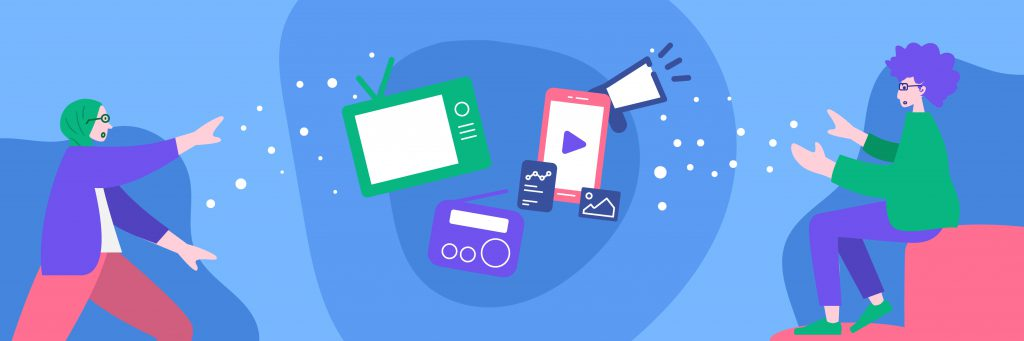
[SourceImage](https://bunnystudio.com/blog/ads-aplenty-radio-tv-facebook/)

[SourceData](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

- TV promotion budget (in million)
- Social Media promotion budget (in million)
- Radio promotion budget (in million)
- Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer
- Sales (in million)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,KFold


In [3]:
sales_df = pd.read_csv('/kaggle/input/Dummy Data HSS.csv')
sales_df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
sales_df=sales_df.dropna()

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


In [7]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,4546.0,54.062912,26.104942,10.000000,32.000000,53.000000,77.000000,100.000000
Radio,4546.0,18.157533,9.663260,0.000684,10.555355,17.859513,25.640603,48.871161
Social Media,4546.0,3.323473,2.211254,0.000031,1.530822,3.055565,4.804919,13.981662
Sales,4546.0,192.413332,93.019873,31.199409,112.434612,188.963678,272.324236,364.079751


In [8]:
#Use get_dummies to one-hot encode the 'Influencer' column
df_encoded = pd.get_dummies(sales_df, columns=['Influencer'], prefix=['Influencer'])


In [9]:
# Create X and y arrays
X = df_encoded.drop("Sales", axis=1).values
y = df_encoded["Sales"].values


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Instantiate the model
reg = LinearRegression()


In [12]:
# Fit the model to the data
reg.fit(X_train,y_train)

LinearRegression()

In [13]:
# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53.13543053 71.06060035], Actual Values: [55.26128448 67.57490362]


## Evaluating  model

In [14]:
# Compute R-squared ,quanties the variance intarget values explained by the features Values range from 0 to 1
r_squared = reg.score(X_test, y_test)

# Compute RMSE in the same units at the target variable
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990150033141404
RMSE: 2.9447428802780298


In [15]:
Kf=KFold(n_splits=6, shuffle=True, random_state=42)

In [16]:
cv_results=cross_val_score(reg,X,y,cv=Kf)

In [17]:
print(cv_results)

[0.99900902 0.99898731 0.99896881 0.99898621 0.99892599 0.99905996]


In [18]:
print(np.mean(cv_results),np.std(cv_results))

0.9989895503769883 4.045977772234045e-05


In [19]:
print(np.quantile(cv_results,[0.025,0.975]))

[0.99893135 0.99905359]


## regularized regression


In [20]:
scores=[]
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    y_pred=ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
print(scores)

[0.999015003425281, 0.9990150044237304, 0.9990150142301002, 0.9990150960015645, 0.9990148701284095]


In [21]:
scores=[]
for alpha in [50.0]:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    y_pred=lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))
print(scores)

[0.998626080160992]


## Lasso for feature selection

In [22]:

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X,y)
sales_columns=['TV','Radio','Social Media','Influencer']
# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)


[ 3.56107377  0.          0.          0.          0.         -0.
 -0.        ]


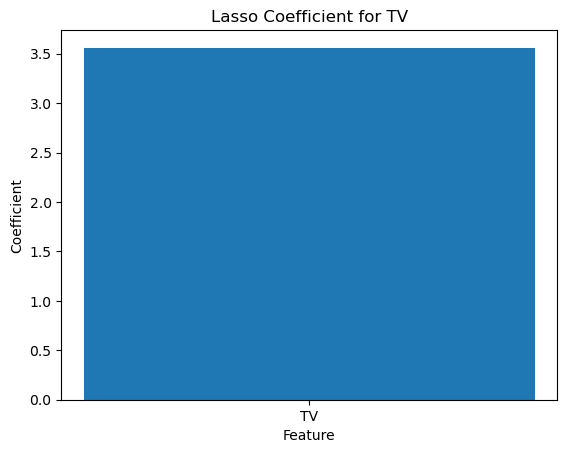

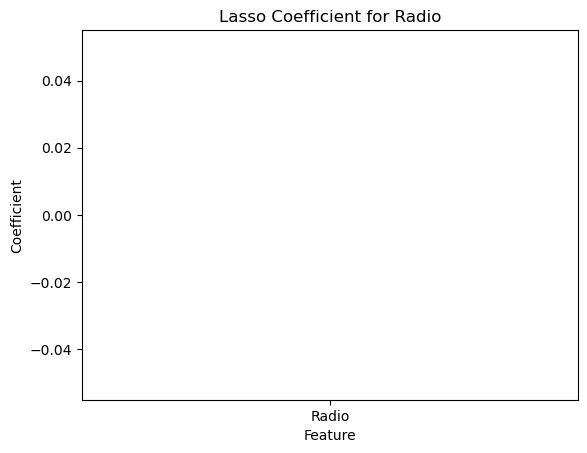

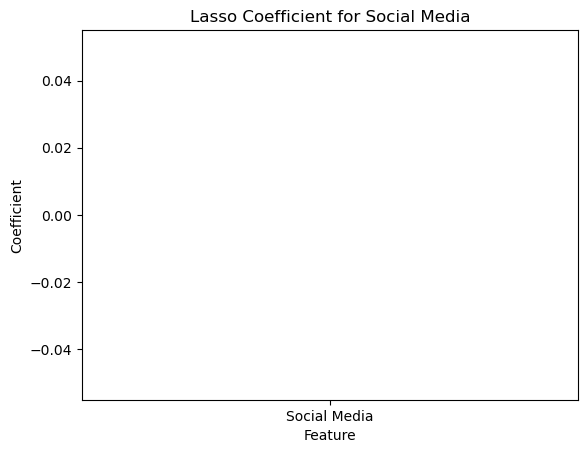

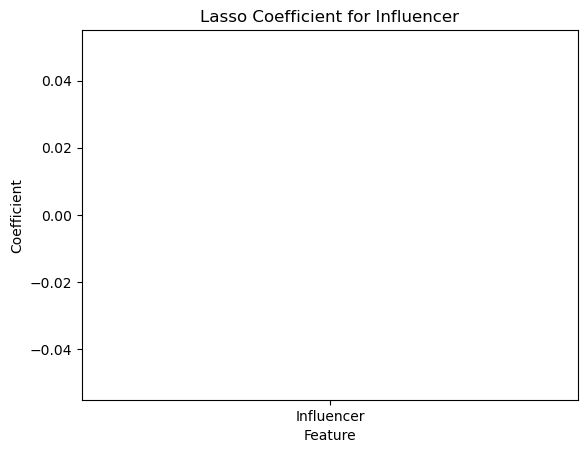

In [23]:
# Create a bar chart for each coefficient
for feature, coef in zip(sales_columns, lasso.coef_):
    plt.figure()
    plt.bar([feature], [coef])
    plt.title(f'Lasso Coefficient for {feature}')
    plt.xlabel('Feature')
    plt.ylabel('Coefficient')

plt.show()